Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Training baseline model...
Epoch 1 - Loss: 1.490
Epoch 2 - Loss: 1.063
Epoch 3 - Loss: 0.851
Epoch 4 - Loss: 0.699
Epoch 5 - Loss: 0.574
Epoch 6 - Loss: 0.460
Epoch 7 - Loss: 0.353
Epoch 8 - Loss: 0.249
Epoch 9 - Loss: 0.170
Epoch 10 - Loss: 0.106
Epoch 11 - Loss: 0.059
Epoch 12 - Loss: 0.034
Epoch 13 - Loss: 0.020
Epoch 14 - Loss: 0.011
Epoch 15 - Loss: 0.009
Epoch 16 - Loss: 0.005
Epoch 17 - Loss: 0.004
Epoch 18 - Loss: 0.004
Epoch 19 - Loss: 0.003
Epoch 20 - Loss: 0.002
Epoch 21 - Loss: 0.002
Epoch 22 - Loss: 0.002
Epoch 23 - Loss: 0.002
Epoch 24 - Loss: 0.002
Epoch 25 - Loss: 0.003
Epoch 26 - Loss: 0.003
Epoch 27 - Loss: 0.001
Epoch 28 - Loss: 0.001
Epoch 29 - Loss: 0.001
Epoch 30 - Loss: 0.001
Epoch 31 - Loss: 0.001
Epoch 32 - Loss: 0.002
Epoch 33 - Loss: 0.001
Epoch 34 - Loss: 0.001
Epoch 35 - Loss: 0.001
Epoch 36 - Loss: 0.001
Epoch 37 - Loss: 0.001
Epoch 38 - Loss: 0.001
Epoch 39 - Lo

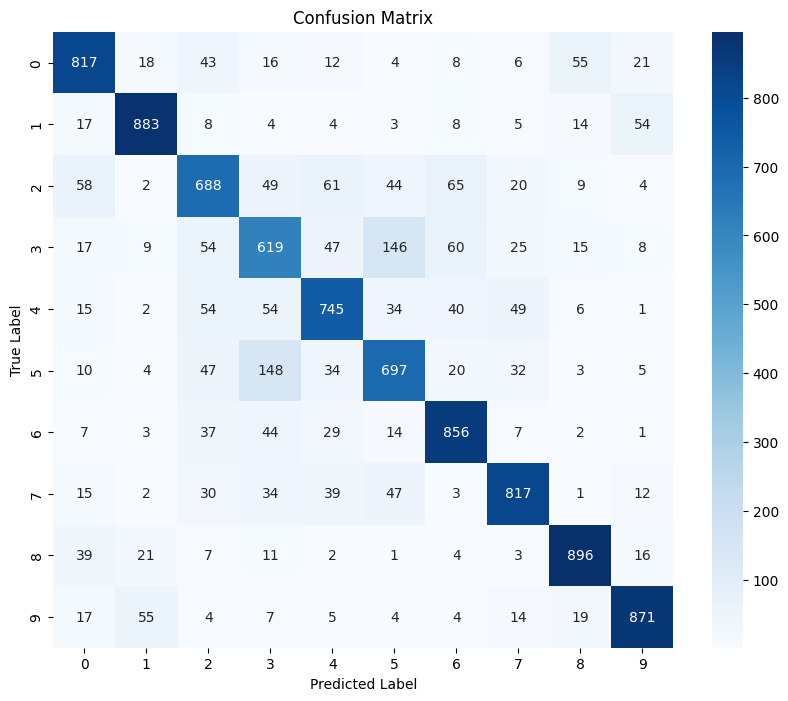

Baseline Model Accuracy: 78.89%

Training model with weight decay...
Epoch 1 - Loss: 1.485
Epoch 2 - Loss: 1.071
Epoch 3 - Loss: 0.866
Epoch 4 - Loss: 0.725
Epoch 5 - Loss: 0.597
Epoch 6 - Loss: 0.480
Epoch 7 - Loss: 0.382
Epoch 8 - Loss: 0.278
Epoch 9 - Loss: 0.193
Epoch 10 - Loss: 0.119
Epoch 11 - Loss: 0.075
Epoch 12 - Loss: 0.048
Epoch 13 - Loss: 0.030
Epoch 14 - Loss: 0.014
Epoch 15 - Loss: 0.009
Epoch 16 - Loss: 0.007
Epoch 17 - Loss: 0.005
Epoch 18 - Loss: 0.004
Epoch 19 - Loss: 0.005
Epoch 20 - Loss: 0.004
Epoch 21 - Loss: 0.004
Epoch 22 - Loss: 0.003
Epoch 23 - Loss: 0.003
Epoch 24 - Loss: 0.003
Epoch 25 - Loss: 0.003
Epoch 26 - Loss: 0.003
Epoch 27 - Loss: 0.003
Epoch 28 - Loss: 0.003
Epoch 29 - Loss: 0.003
Epoch 30 - Loss: 0.003
Epoch 31 - Loss: 0.002
Epoch 32 - Loss: 0.002
Epoch 33 - Loss: 0.002
Epoch 34 - Loss: 0.002
Epoch 35 - Loss: 0.002
Epoch 36 - Loss: 0.003
Epoch 37 - Loss: 0.002
Epoch 38 - Loss: 0.002
Epoch 39 - Loss: 0.002
Epoch 40 - Loss: 0.003
Epoch 41 - Loss: 0.1

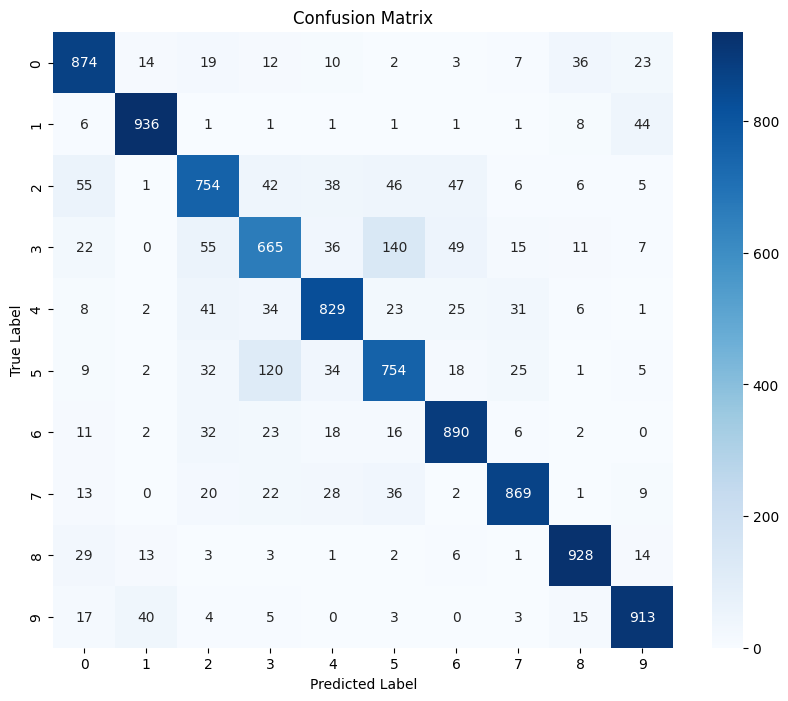

Model with Weight Decay Accuracy: 84.12%

Training model with dropout...
Epoch 1 - Loss: 1.665
Epoch 2 - Loss: 1.295
Epoch 3 - Loss: 1.089
Epoch 4 - Loss: 0.963
Epoch 5 - Loss: 0.876
Epoch 6 - Loss: 0.807
Epoch 7 - Loss: 0.749
Epoch 8 - Loss: 0.697
Epoch 9 - Loss: 0.647
Epoch 10 - Loss: 0.603
Epoch 11 - Loss: 0.559
Epoch 12 - Loss: 0.524
Epoch 13 - Loss: 0.487
Epoch 14 - Loss: 0.458
Epoch 15 - Loss: 0.425
Epoch 16 - Loss: 0.398
Epoch 17 - Loss: 0.368
Epoch 18 - Loss: 0.339
Epoch 19 - Loss: 0.322
Epoch 20 - Loss: 0.297
Epoch 21 - Loss: 0.273
Epoch 22 - Loss: 0.253
Epoch 23 - Loss: 0.237
Epoch 24 - Loss: 0.221
Epoch 25 - Loss: 0.201
Epoch 26 - Loss: 0.185
Epoch 27 - Loss: 0.173
Epoch 28 - Loss: 0.158
Epoch 29 - Loss: 0.145
Epoch 30 - Loss: 0.137
Epoch 31 - Loss: 0.129
Epoch 32 - Loss: 0.120
Epoch 33 - Loss: 0.108
Epoch 34 - Loss: 0.102
Epoch 35 - Loss: 0.097
Epoch 36 - Loss: 0.092
Epoch 37 - Loss: 0.085
Epoch 38 - Loss: 0.082
Epoch 39 - Loss: 0.080
Epoch 40 - Loss: 0.077
Epoch 41 - Loss:

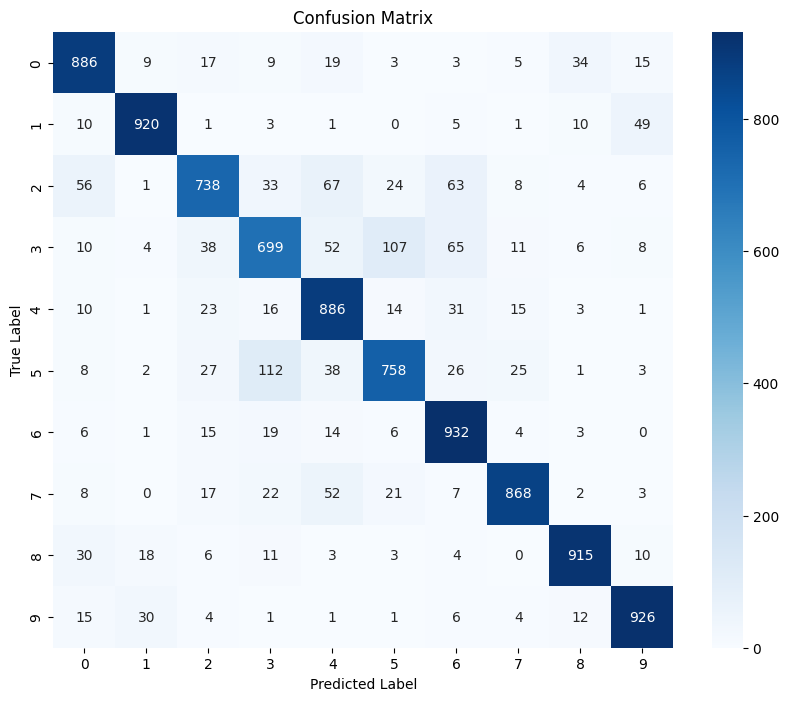

Model with Dropout Accuracy: 85.28%


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ResNet Block
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, dropout_prob=0.0):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.dropout = nn.Dropout(dropout_prob)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = nn.ReLU()(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.bn2(self.conv2(out))
        out += self.shortcut(identity)
        out = nn.ReLU()(out)
        return out

# ResNet-10 Model
class ResNet10(nn.Module):
    def __init__(self, dropout_prob=0.0):
        super(ResNet10, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)

        self.layer1 = self._make_layer(64, 64, stride=1, num_blocks=1, dropout_prob=dropout_prob)
        self.layer2 = self._make_layer(64, 128, stride=2, num_blocks=1, dropout_prob=dropout_prob)
        self.layer3 = self._make_layer(128, 256, stride=2, num_blocks=1, dropout_prob=dropout_prob)
        self.layer4 = self._make_layer(256, 512, stride=2, num_blocks=1, dropout_prob=dropout_prob)

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 10)

    def _make_layer(self, in_channels, out_channels, stride, num_blocks, dropout_prob):
        layers = []
        layers.append(ResNetBlock(in_channels, out_channels, stride, dropout_prob))
        for _ in range(1, num_blocks):
            layers.append(ResNetBlock(out_channels, out_channels, 1, dropout_prob))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = nn.ReLU()(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Load CIFAR-10 Data
def load_cifar10_data(batch_size=64):
    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader

# Evaluate Model
def evaluate_model(model, testloader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return accuracy

# Train the Model
def train_model(model, trainloader, testloader, device, num_epochs=300, weight_decay=0.0):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=weight_decay)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Print statistics
        running_loss /= len(trainloader)
        print(f'Epoch {epoch + 1} - Loss: {running_loss:.3f}')

    print('Finished Training')
    return model

# Main Function
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f'Using device: {device}')

    trainloader, testloader = load_cifar10_data()

    # Train and Evaluate Baseline Model
    print("Training baseline model...")
    baseline_model = ResNet10().to(device)
    trained_baseline_model = train_model(baseline_model, trainloader, testloader, device, num_epochs=300)
    print("Evaluating baseline model...")
    baseline_accuracy = evaluate_model(trained_baseline_model, testloader, device)
    print(f'Baseline Model Accuracy: {baseline_accuracy:.2f}%\n')

    # Train and Evaluate Model with Weight Decay
    print("Training model with weight decay...")
    wd_model = ResNet10().to(device)
    trained_wd_model = train_model(wd_model, trainloader, testloader, device, num_epochs=300, weight_decay=0.001)
    print("Evaluating model with weight decay...")
    wd_accuracy = evaluate_model(trained_wd_model, testloader, device)
    print(f'Model with Weight Decay Accuracy: {wd_accuracy:.2f}%\n')

    # Train and Evaluate Model with Dropout
    print("Training model with dropout...")
    dropout_model = ResNet10(dropout_prob=0.3).to(device)
    trained_dropout_model = train_model(dropout_model, trainloader, testloader, device, num_epochs=300)
    print("Evaluating model with dropout...")
    dropout_accuracy = evaluate_model(trained_dropout_model, testloader, device)
    print(f'Model with Dropout Accuracy: {dropout_accuracy:.2f}%')

if __name__ == "__main__":
    main()
